In [1]:
!git clone https://github.com/michaelhunter12/KNN.git

Cloning into 'KNN'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (10/10), done.
remote: Total 60 (delta 9), reused 9 (delta 9), pack-reused 50 (from 1)
Receiving objects: 100% (60/60), 20.74 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?

Regression is used to predict a numerical value, whereas classification is used to predict a category.

2. What is a confusion table? What does it help us understand about a model's performance?

Confusion table cross tabulates predicted and true values. They help inform whether a model is doing well nor not. Helps understand accuracy.

3. What does the SSE quantify about a particular model?

It quantifies the difference between the predicted values and observed data point.

4. What are overfitting and underfitting?

Overfitting happens when the model is trained too well on the data and becomes unable of actually looking at the trends, meaning it cannot make good predctions on new data.

Underfitting occurs when the model is not robust enough.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

You don't want the model to be fit on test data, as it essentially leads to confirmation bias. Choosing k by evaluating accuracy on the test set improves model performance because it is able to show where the minimum error occurs.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

First: It is easy to understand a prediction. It fails because it does not take into account probability, meaning that the prediction should be taken with limited confidence.

Second: It is strong because it is easier to have confidence in the output. However, if the model is poor, the probabilities will also be poor, leading to negative consequences.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

Done

There were no `NA`'s to handle (i think)

2499 x 13

2. Maxmin normalize `year` and `mileage`.

Done

3. Split the sample into ~80% for training and ~20% for evaluation.

Done

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

As you increase $k$, the MSE goes down, but there appears to be a $k$ value inbetween 50 and 100 where the lowest MSE is attained. Past 100, MSE values increase again.

5. Determine the optimal $k$ for these data.

88

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

At small $k$ values, the model was overfitting the data because thats "all it could see". It only had a very small subset of observations to run on, so it could not make very good predictions, as it was heavily relying on the training data. However, as $k$ increased, the predictions got better (seen in the lowering of MSE), until it reached a minimum at 88 (optimal $k$ value). Past this point, the model was underfitting, as there were "too many" data points it was looking at, and it could not predict and capture its local environment.

In [51]:
cars1 = pd.read_csv("./KNN/data/USA_cars_datasets.csv")
cars1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
cars1.shape

(2499, 13)

In [52]:
cars2 = cars1[['price', 'year', 'mileage']]
cars2.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [ ]:
display(cars2.isnull().sum())

,0
price,0
year,0
mileage,0


In [ ]:
def minmax_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

cars2['year_norm'] = minmax_normalize(cars1['year'])
cars2['mileage_norm'] = minmax_normalize(cars1['mileage'])

cars2.head()

/tmp/ipython-input-1822031513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['year_norm'] = minmax_normalize(cars1['year'])
/tmp/ipython-input-1822031513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars2['mileage_norm'] = minmax_normalize(cars1['mileage'])


,price,year,mileage,year_norm,mileage_norm
0,6300,0.744681,0.269287,0.744681,0.269287
1,2899,0.808511,0.187194,0.808511,0.187194
2,5350,0.957447,0.038892,0.957447,0.038892
3,25000,0.872340,0.063016,0.872340,0.063016
4,27700,0.957447,0.006537,0.957447,0.006537


In [ ]:
from sklearn.model_selection import train_test_split

X = cars2[['year_norm', 'mileage_norm']]
y = cars2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

k = 3, Mean Squared Error (MSE): 159200762.09


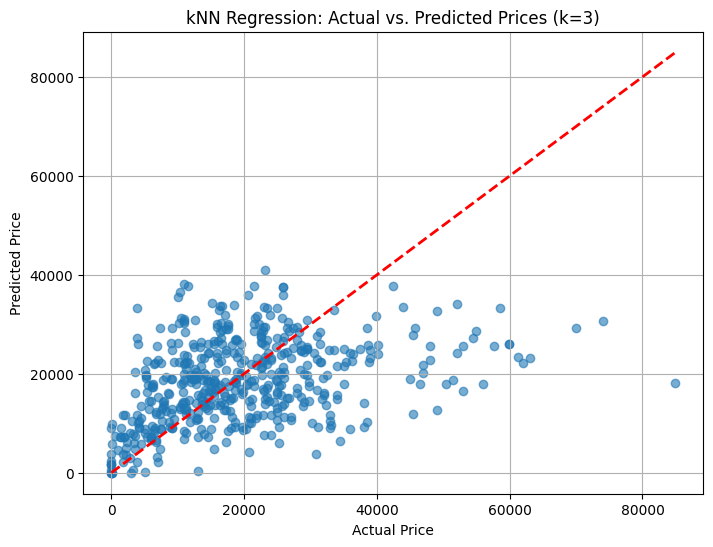

k = 10, Mean Squared Error (MSE): 138929910.76


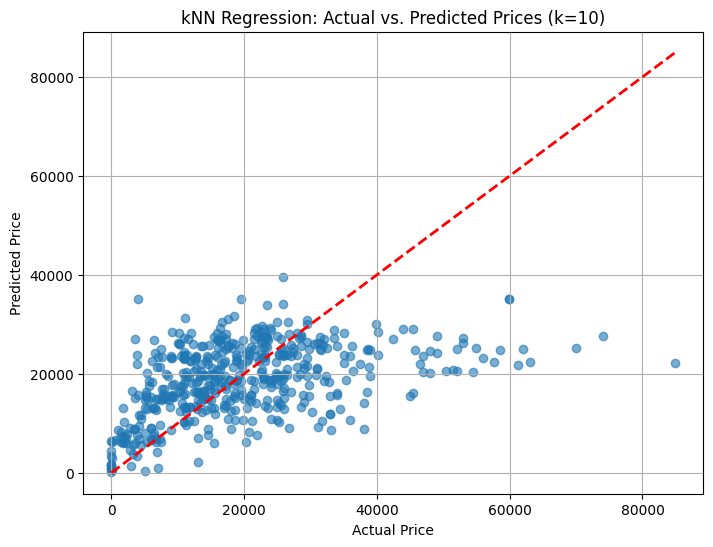

k = 25, Mean Squared Error (MSE): 130605395.06


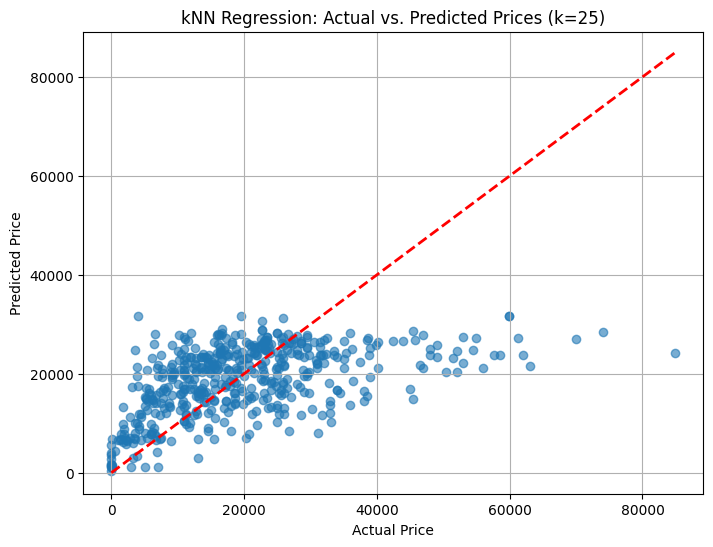

k = 50, Mean Squared Error (MSE): 129637841.19


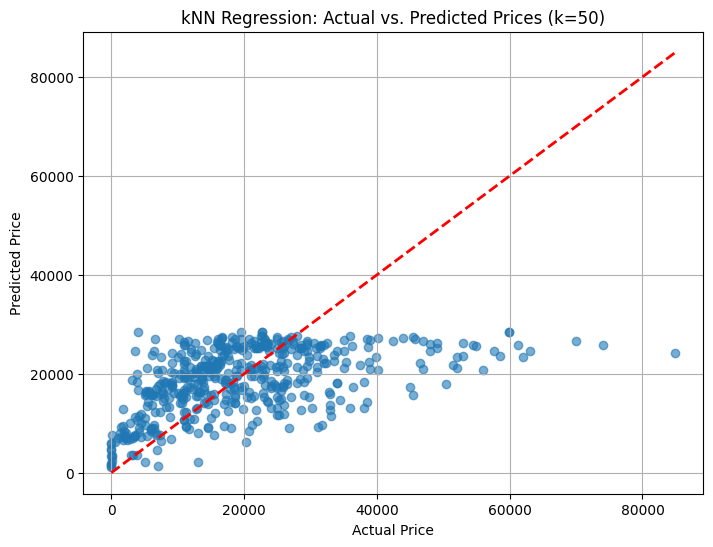

k = 100, Mean Squared Error (MSE): 128157897.62


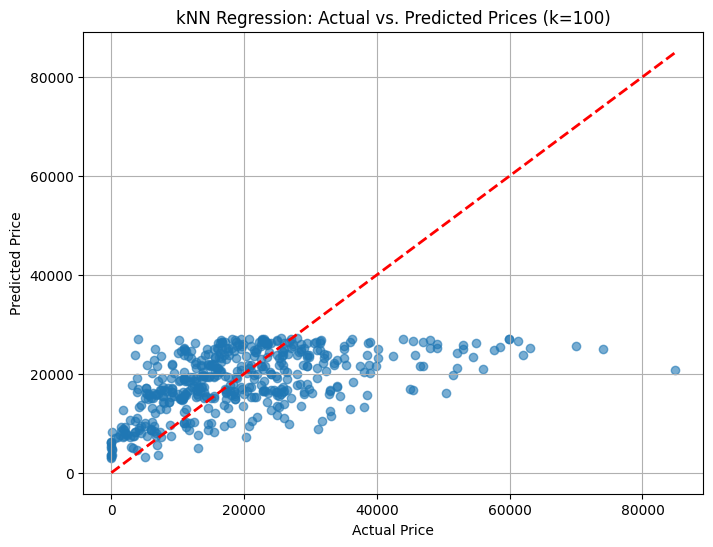

k = 300, Mean Squared Error (MSE): 131470944.20


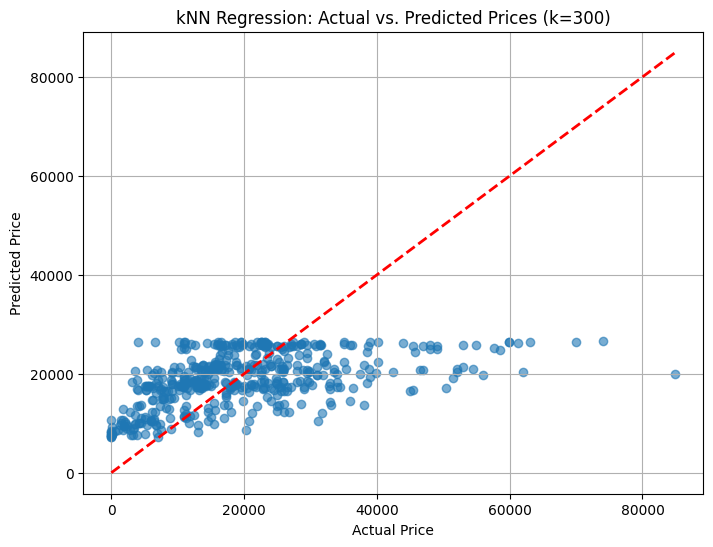

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    # Initialize and train the kNN regressor
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'k = {k}, Mean Squared Error (MSE): {mse:.2f}')

    # Create scatterplot of actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'kNN Regression: Actual vs. Predicted Prices (k={k})')
    plt.grid(True)
    plt.show()

#GeminiAI

In [ ]:
import pandas as pd

k_values = [3, 10, 25, 50, 100, 300]
mse_values = [
    159200762.09,
    138929910.76,
    130605395.06,
    129637841.19,
    128157897.62,
    131470944.20
]

mse_table = pd.DataFrame({
    'k Value': k_values,
    'Mean Squared Error (MSE)': mse_values
})

display(mse_table)

,k Value,Mean Squared Error (MSE)
0,3,1.592008e+08
1,10,1.389299e+08
2,25,1.306054e+08
3,50,1.296378e+08
4,100,1.281579e+08
5,300,1.314709e+08


In [ ]:
k_bar = 300
SSE = []
SSE_on_train = []

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum( (y_test-y_hat)**2 ))
    y_hat = fitted_model.predict(X_train)
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

[88]


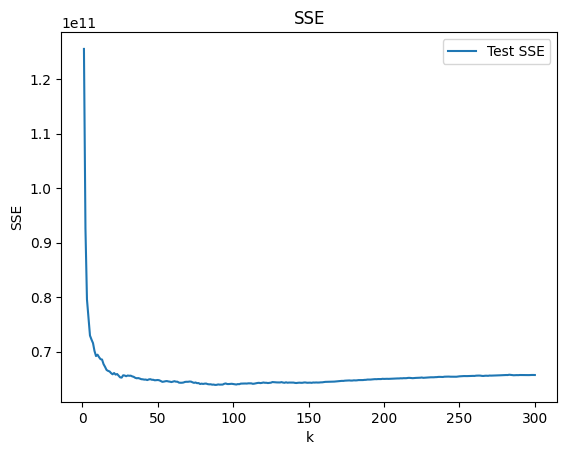

In [ ]:
plt.plot(np.arange(1,k_bar+1),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

The biggest class contains 40 animals, the smallest contains 4. Feathers, eggs, milk, backbone, fins, and airborne are probably good variables to predict classes, as there is limited variation within groups for these variables.

2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

Done?

3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

Done??

Range of $k$ was from 1 to number of samples from the training set. Classifier was trained on data set, then compared against the test set to get an accuracy. The accuracy was plotted against $k$. The highest accuracy wins.

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

I can see how 7 and 5 got mixed up, as the table of descriptive statistics shows that they have similar characteristics. I can also see how the fish got mixed with the reptiles (3 and 4), as they have similar characteristics that may have confused the model. 7 and 3 makes the least sense from a "non-model" standpoint, as class 7 are invertebrates, and therefore shouldn't be confused with group 3. But the model does not have that intuitive information, so that information does not have as strong an impact as it should in predicitve classification.


5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

All of the classes are not represented in the probability table. The model was trained with all 7 classes. However, for classes 5,6 and 7, those features were not well represented enough to be seen as individual classes, so the model moved them into classes 1,2,3, and 4. This is why they are not represented in the probability prediction, but they appear in the confusion matrix. As seen in the confusion matrix, the model was unable to properly predict classes 5,6 and 7 into their correct class.

In [3]:
lion_king = pd.read_csv("./KNN/data/zoo.csv")
lion_king.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
lion_king.shape

(101, 18)

In [10]:
for class_label, group in lion_king.groupby('class'):
    animal_names = group['animal'].unique()
    print(f"Class {class_label}: {', '.join(animal_names)}")
"Class Distribution:\n", lion_king['class'].value_counts().sort_index()

Class 1: aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf
Class 2: chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
Class 3: pitviper, seasnake, slowworm, tortoise, tuatara
Class 4: bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
Class 5: frog, newt, toad
Class 6: flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
Class 7: clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm


('Class Distribution:\n',
 class
 1    41
 2    20
 3     5
 4    13
 5     4
 6     8
 7    10
 Name: count, dtype: int64)

In [11]:
feature_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
class_feature_stats = lion_king.groupby('class')[feature_columns].mean()
print("Descriptive statistics of features by class (mean values):")
display(class_feature_stats)

Descriptive statistics of features by class (mean values):


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class,,,,,,,,,,,,,,,,
1,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488
2,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000
3,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000
4,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692
5,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000
6,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000
7,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000


In [14]:
from sklearn.model_selection import train_test_split

X_lion = lion_king[feature_columns]
y_lion = lion_king['class']

X_train_lion, X_test_lion, y_train_lion, y_test_lion = train_test_split(X_lion, y_lion, test_size=0.5, random_state=67)

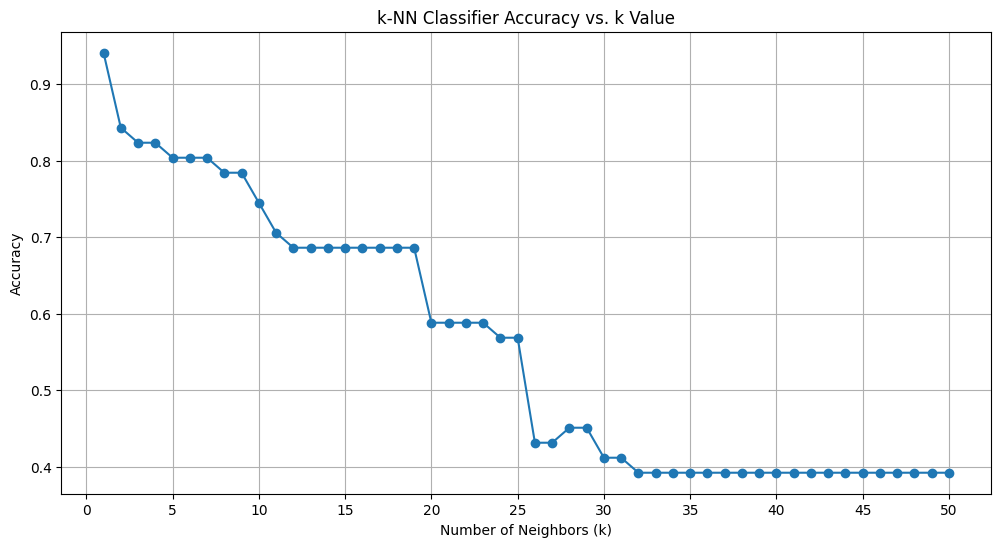

The optimal k value is: 1 with an accuracy of 0.9412


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

k_range = range(1, len(X_train_lion) + 1) # Test k from 1 up to the number of training samples
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_lion, y_train_lion)
    y_pred_lion = knn.predict(X_test_lion)
    accuracies.append(accuracy_score(y_test_lion, y_pred_lion))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-')
plt.title('k-NN Classifier Accuracy vs. k Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, len(X_train_lion) + 1, 5)) # Adjust x-axis ticks for better readability
plt.grid(True)
plt.show()

# Determine the optimal k
optimal_k_index = np.argmax(accuracies)
optimal_k = k_range[optimal_k_index]
max_accuracy = accuracies[optimal_k_index]

print(f"The optimal k value is: {optimal_k} with an accuracy of {max_accuracy:.4f}")

#GeminiAI

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Re-train the optimal kNN model (k=1)
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train_lion, y_train_lion)
y_pred_optimal = optimal_knn.predict(X_test_lion)

# Generate the confusion matrix
cm = confusion_matrix(y_test_lion, y_pred_optimal)

# Get unique class labels for clearer indexing
class_labels = sorted(y_test_lion.unique())

# Create a Pandas DataFrame from the confusion matrix
confusion_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

#GeminiAI

In [40]:
class_labels = sorted(y_test_lion.unique())

confusion_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(f'Confusion Matrix for Optimal k-NN (k={optimal_k}): (Rows=Actual Class, Columns=Predicted Class)')
display(confusion_df)

Confusion Matrix for Optimal k-NN (k=1): (Rows=Actual Class, Columns=Predicted Class)


,1,2,3,4,5,6,7
1,20,0,0,0,0,0,0
2,0,11,0,0,0,0,0
3,0,0,1,1,0,0,0
4,0,0,0,5,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,5,0
7,0,0,1,0,1,0,5


In [47]:
feature_columns_reduced = ['milk', 'aquatic', 'airborne']
X_reduced = lion_king[feature_columns_reduced]
y_reduced = lion_king['class']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.5, random_state=67)

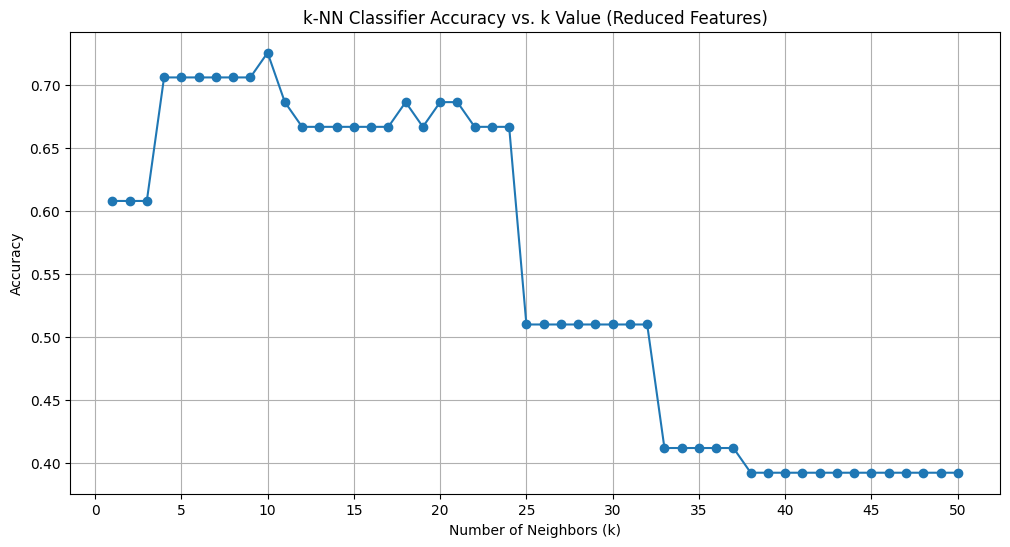

The optimal k value for reduced features is: 10 with an accuracy of 0.7255


In [48]:
k_range_reduced = range(1, len(X_train_reduced) + 1)
accuracies_reduced = []

for k in k_range_reduced:
    knn_reduced = KNeighborsClassifier(n_neighbors=k)
    knn_reduced.fit(X_train_reduced, y_train_reduced)
    y_pred_reduced = knn_reduced.predict(X_test_reduced)
    accuracies_reduced.append(accuracy_score(y_test_reduced, y_pred_reduced))

plt.figure(figsize=(12, 6))
plt.plot(k_range_reduced, accuracies_reduced, marker='o', linestyle='-')
plt.title('k-NN Classifier Accuracy vs. k Value (Reduced Features)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, len(X_train_reduced) + 1, 5))
plt.grid(True)
plt.show()

# Determine the optimal k for reduced features
optimal_k_reduced_index = np.argmax(accuracies_reduced)
optimal_k_reduced = k_range_reduced[optimal_k_reduced_index]
max_accuracy_reduced = accuracies_reduced[optimal_k_reduced_index]

print(f"The optimal k value for reduced features is: {optimal_k_reduced} with an accuracy of {max_accuracy_reduced:.4f}")

In [50]:
optimal_knn_reduced = KNeighborsClassifier(n_neighbors=optimal_k_reduced)
optimal_knn_reduced.fit(X_train_reduced, y_train_reduced)
y_pred_optimal_reduced = optimal_knn_reduced.predict(X_test_reduced)


cm_reduced = confusion_matrix(y_test_reduced, y_pred_optimal_reduced)

confusion_df_reduced = pd.DataFrame(cm_reduced,
                                    index=[f'Actual Class {c}' for c in sorted(y_test_reduced.unique())],
                                    columns=[f'Predicted Class {c}' for c in optimal_knn_reduced.classes_])

print(f'Confusion Matrix for Optimal k-NN (k={optimal_k_reduced}) with Reduced Features:')
display(confusion_df_reduced)

# 6. Predict probabilities
probabilities = optimal_knn_reduced.predict_proba(X_test_reduced)

print('\nSample of Predicted Probabilities (first 5 test samples):')
# Get class names from the model's classes_ attribute
probability_df = pd.DataFrame(probabilities, columns=[f'Prob Class {c}' for c in optimal_knn_reduced.classes_])
display(probability_df.head())

#Probabilities done with GeminiAI

Confusion Matrix for Optimal k-NN (k=10) with Reduced Features:


,Predicted Class 1,Predicted Class 2,Predicted Class 3,Predicted Class 4,Predicted Class 5,Predicted Class 6,Predicted Class 7
Actual Class 1,20,0,0,0,0,0,0
Actual Class 2,0,10,1,0,0,0,0
Actual Class 3,0,0,2,0,0,0,0
Actual Class 4,0,0,0,5,0,0,0
Actual Class 5,0,0,0,1,0,0,0
Actual Class 6,0,4,1,0,0,0,0
Actual Class 7,0,0,3,4,0,0,0



Sample of Predicted Probabilities (first 5 test samples):


,Prob Class 1,Prob Class 2,Prob Class 3,Prob Class 4,Prob Class 5,Prob Class 6,Prob Class 7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.2,0.3,0.2,0.0,0.1,0.1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.6,0.0,0.0,0.0,0.2,0.0


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist # For efficient distance calculations

def my_kde_plot(data, kernel='gaussian', bandwidth='silverman', num_points=500, plot=True, ax=None):

   #def my_kde_plot_worse(data, kernel='gaussian', bandwidth=2000, num_points=500, plot=True, ax=None):
   # could change the bandwidth to a fixed number, which would result in undersmoothing.

    # Convert data to numpy array for consistent handling
    data = np.asarray(data).flatten()

    # 1. Determine evaluation points (x-axis for the plot)
    data_min, data_max = data.min(), data.max()
    x_eval = np.linspace(data_min - (data_max - data_min) * 0.2,
                         data_max + (data_max - data_min) * 0.2,
                         num_points)

    # 2. Determine bandwidth
    if bandwidth == 'silverman':
        # Silverman's rule of thumb for optimal bandwidth (for Gaussian kernel)
        # h = (4 * std_dev^5 / (3 * n))^(1/5)
        # A common simplification is 0.9 * min(std, IQR/1.34) * n^(-1/5)
        n = len(data)
        std_dev = np.std(data)
        iqr = np.subtract(*np.percentile(data, [75, 25]))
        h = 0.9 * min(std_dev, iqr / 1.34) * (n ** -0.2)
        if h == 0: # Handle cases with no variance
            h = 1.0 # Fallback to a default small value
    elif isinstance(bandwidth, (int, float)) and bandwidth > 0:
        h = bandwidth
    else:
        raise ValueError("Bandwidth must be 'silverman' or a positive float.")

    # 3. Implement kernels
    def gaussian_kernel(z):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

    def uniform_kernel(z):
        return np.where(np.abs(z) <= 1, 0.5, 0.0)

    def epanechnikov_kernel(z):
        return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0.0)

    kernels = {
        'gaussian': gaussian_kernel,
        'uniform': uniform_kernel,
        'epanechnikov': epanechnikov_kernel
    }

    if kernel not in kernels:
        raise ValueError(f"Invalid kernel type. Choose from {list(kernels.keys())}")

    current_kernel = kernels[kernel]

#I really don't understand how lines 2 and 3 function.

    # 4. Calculate KDE
    # Use cdist for efficient calculation of (x_i - x_j) / h
    # shape (len(x_eval), len(data))
    scaled_distances = cdist(x_eval.reshape(-1, 1), data.reshape(-1, 1)) / h

    # Apply kernel function to all scaled distances
    kernel_values = current_kernel(scaled_distances)

    # Sum kernel values for each evaluation point and normalize
    density_values = np.sum(kernel_values, axis=1) / (len(data) * h)

    if plot:
        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(x_eval, density_values, label=f'My KDE (Kernel: {kernel}, BW: {h:.2f})')
        ax.hist(data, bins=30, density=True, alpha=0.3, label='Histogram')
        ax.set_title('Custom Kernel Density Estimate')
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        if ax is None: # Only show if new figure was created
            plt.show()
    else:
        return x_eval, density_values

#no way was I going to figure this out by myself...I weep

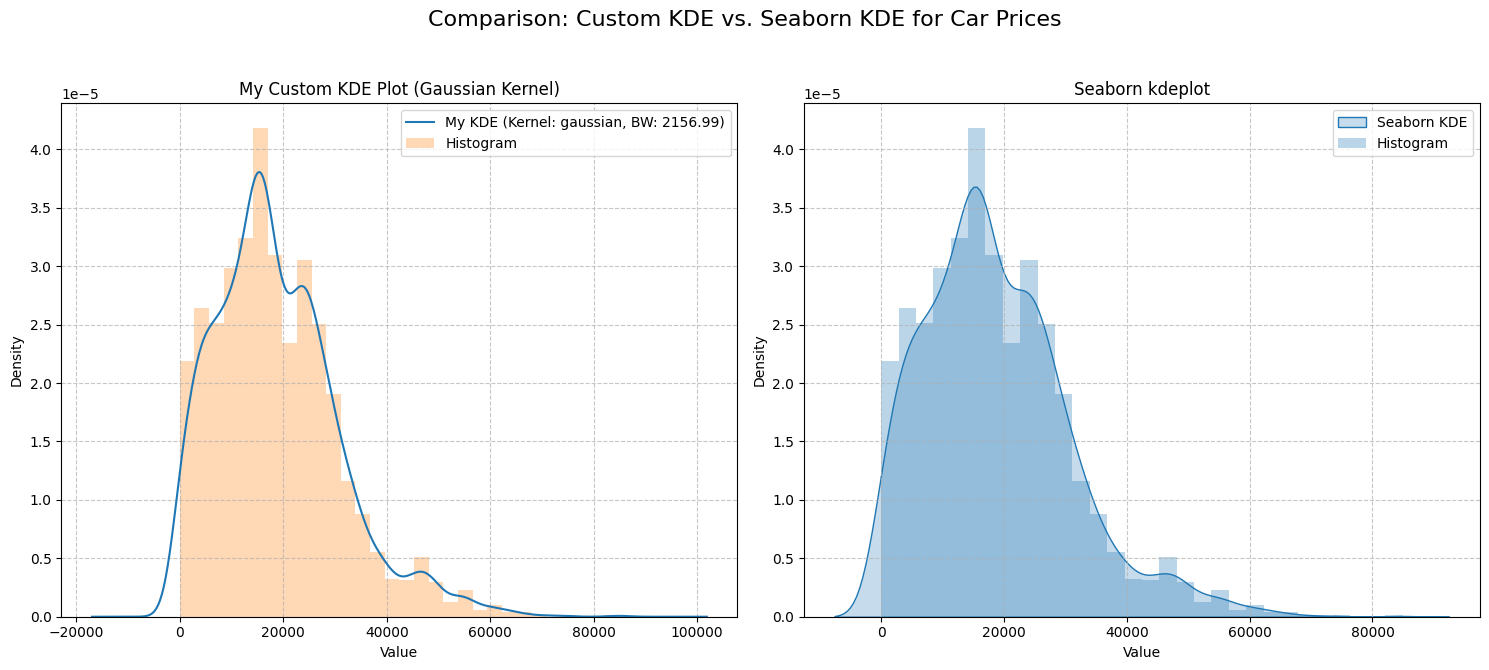

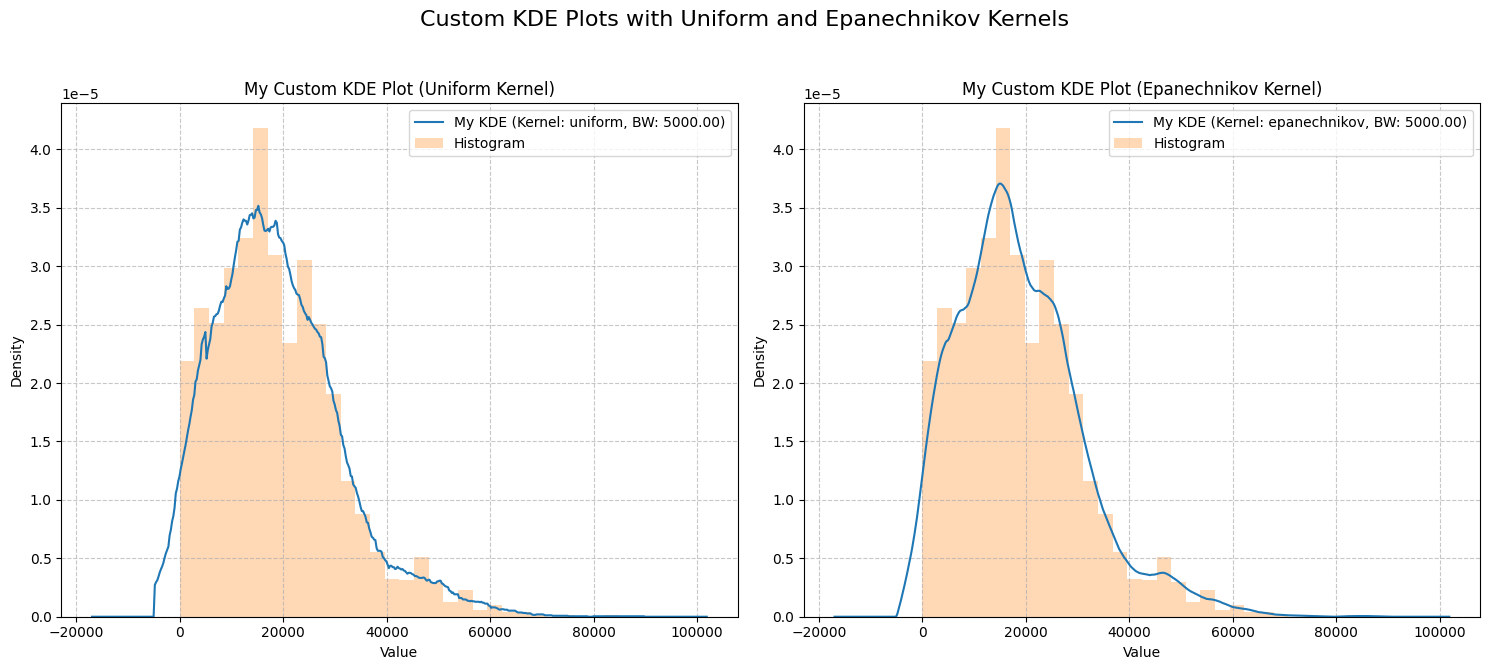

In [63]:
data_for_kde = cars2['price']

plt.figure(figsize=(15, 7))

# --- My Custom KDE Plot (Gaussian) ---
ax1 = plt.subplot(1, 2, 1)
my_kde_plot(data_for_kde, kernel='gaussian', bandwidth='silverman', ax=ax1)
ax1.set_title('My Custom KDE Plot (Gaussian Kernel)')

#


# --- Seaborn KDE Plot ---
ax2 = plt.subplot(1, 2, 2)
sns.kdeplot(data_for_kde, fill=True, ax=ax2, label='Seaborn KDE')
ax2.hist(data_for_kde, bins=30, density=True, alpha=0.3, label='Histogram')
ax2.set_title('Seaborn kdeplot')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Comparison: Custom KDE vs. Seaborn KDE for Car Prices', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15, 7))
# --- My Custom KDE Plot (Uniform) ---
ax3 = plt.subplot(1, 2, 1)
my_kde_plot(data_for_kde, kernel='uniform', bandwidth=5000, ax=ax3) # Using a fixed bandwidth for uniform
ax3.set_title('My Custom KDE Plot (Uniform Kernel)')

# --- My Custom KDE Plot (Epanechnikov) ---
ax4 = plt.subplot(1, 2, 2)
my_kde_plot(data_for_kde, kernel='epanechnikov', bandwidth=5000, ax=ax4) # Using a fixed bandwidth for Epanechnikov
ax4.set_title('My Custom KDE Plot (Epanechnikov Kernel)')

plt.suptitle('Custom KDE Plots with Uniform and Epanechnikov Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#WOW, code who's function I actually understand....